In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn import datasets

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
db=pd.read_csv('diabetes.csv')

In [7]:
db.head()

AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135

In [9]:
db.columns.tolist()

['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']

In [10]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [46]:
db.describe()

AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               S3          S4          S5          S6           Y  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
std     12.934202    1.290450    0.522391   11.496335   77.093005  
min     22.000000    2.000000    3.258100   58.000000   25.000000  
25%     40.250000    3.000000    4.276700   83.250000   87.000000  
50%     48.000000    4.000000    4.620050   91.000000  140.500000  
75%     57.750000    5.000000    4.997200   98.000000  211.500000  
max     99.000000    9.090000    6.107000  124.000000  346.000000

array([[<AxesSubplot:title={'center':'AGE'}>]], dtype=object)

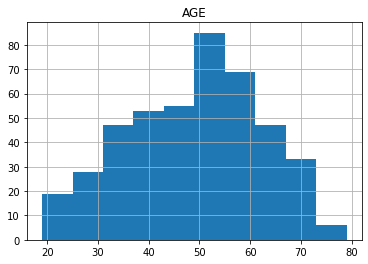

In [37]:
db.hist('AGE')

<AxesSubplot:>

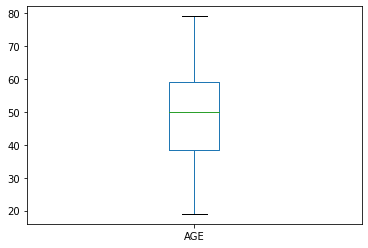

In [42]:
db.AGE.plot.box()

array([[<AxesSubplot:title={'center':'SEX'}>]], dtype=object)

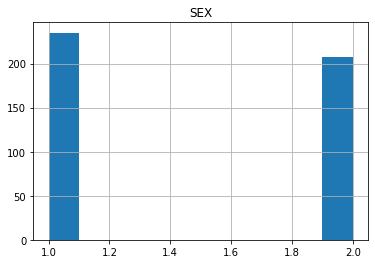

In [38]:
db.hist('SEX')

array([[<AxesSubplot:title={'center':'BMI'}>]], dtype=object)

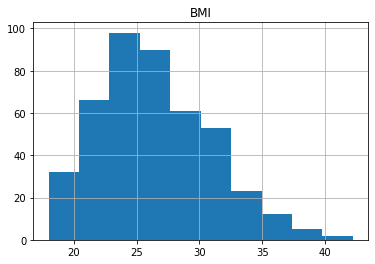

In [45]:
db.hist('BMI')

<AxesSubplot:>

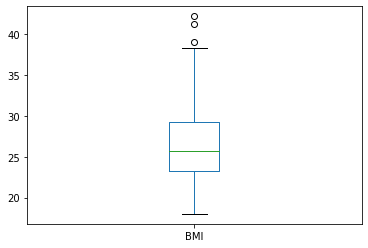

In [49]:
db.BMI.plot.box()

array([[<AxesSubplot:title={'center':'BP'}>]], dtype=object)

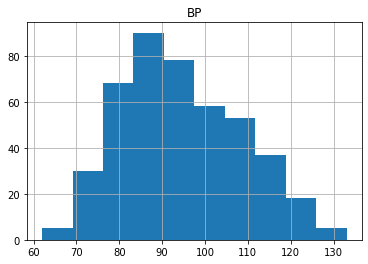

In [47]:
db.hist('BP')

<AxesSubplot:>

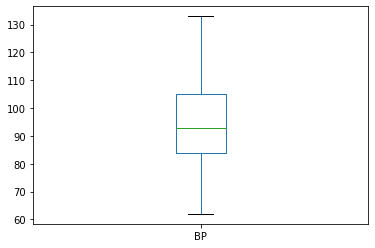

In [50]:
db.BP.plot.box()

array([[<AxesSubplot:title={'center':'S5'}>]], dtype=object)

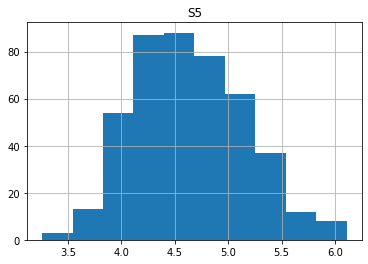

In [51]:
db.hist('S5')

<AxesSubplot:>

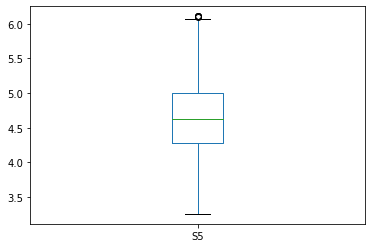

In [52]:
db.S5.plot.box()

<AxesSubplot:xlabel='AGE', ylabel='Y'>

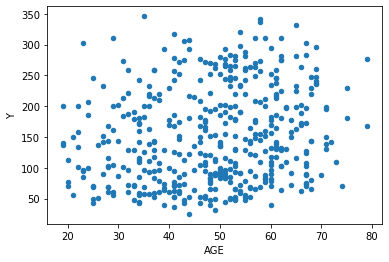

In [13]:
db.plot.scatter('AGE','Y')

In [17]:
np.corrcoef(db.AGE,db.Y)

array([[1.        , 0.18788875],
       [0.18788875, 1.        ]])

<AxesSubplot:xlabel='BMI', ylabel='Y'>

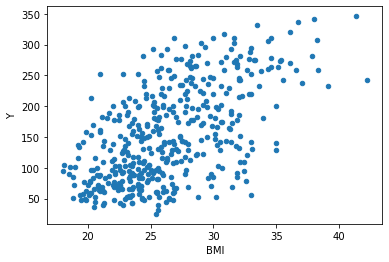

In [15]:
db.plot.scatter('BMI','Y')

In [18]:
np.corrcoef(db.BMI,db.Y)

array([[1.        , 0.58645013],
       [0.58645013, 1.        ]])

<AxesSubplot:xlabel='BP', ylabel='Y'>

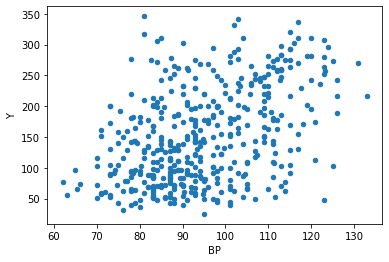

In [16]:
db.plot.scatter('BP','Y')

In [19]:
np.corrcoef(db.BP,db.Y)

array([[1.        , 0.44148176],
       [0.44148176, 1.        ]])

<AxesSubplot:xlabel='S1', ylabel='Y'>

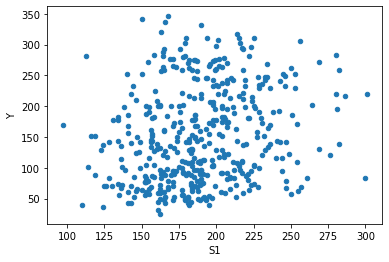

In [20]:
db.plot.scatter('S1','Y')

In [21]:
np.corrcoef(db.S1,db.Y)

array([[1.        , 0.21202248],
       [0.21202248, 1.        ]])

In [11]:
corr_matrix=db.corr()

In [12]:
corr_matrix

AGE       SEX       BMI        BP        S1        S2        S3  \
AGE  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
SEX  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
BMI  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
BP   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
S1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
S2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
S3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
S4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
S5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
S6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
Y    0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

           S4        S5        S6         Y  
AGE  0.203841  0.270774  0.301731  0.187889  
SEX  0.332115  0.149916  0.208133  0.043062  
BMI  0.413807  0.446157  0.388680  0.586450  
BP   0.257650  0.393480  0.390430  0.441482  
S1   0.542207  0.515503  0.325717  0.212022  
S2   0.659817  0.318357  0.290600  0.174054  
S3  -0.738493 -0.398577 -0.273697 -0.394789  
S4   1.000000  0.617859  0.417212  0.430453  
S5   0.617859  1.000000  0.464669  0.565883  
S6   0.417212  0.464669  1.000000  0.382483  
Y    0.430453  0.565883  0.382483  1.000000

<AxesSubplot:>

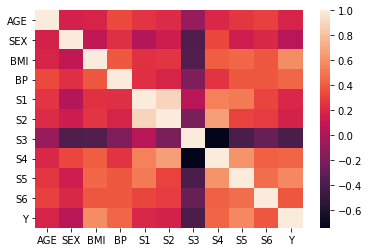

In [26]:
sns.heatmap(corr_matrix)

<AxesSubplot:xlabel='S5', ylabel='Y'>

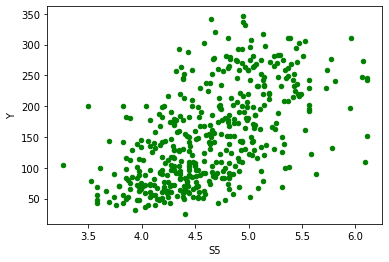

In [31]:
db.plot.scatter('S5','Y',color='green')

<AxesSubplot:xlabel='BMI', ylabel='Y'>

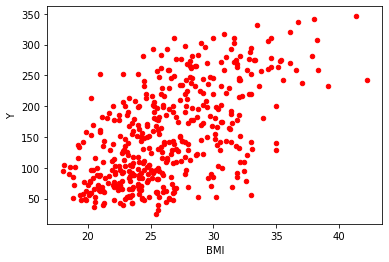

In [32]:
db.plot.scatter('BMI','Y',color='red')

In [55]:
db.isnull().values.any()

False

In [14]:
dataset=db.iloc[:,:-1] #zmienne bez Y
dataset 

AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6
0     59    2  32.1  101.00  157   93.2  38.0  4.00  4.8598   87
1     48    1  21.6   87.00  183  103.2  70.0  3.00  3.8918   69
2     72    2  30.5   93.00  156   93.6  41.0  4.00  4.6728   85
3     24    1  25.3   84.00  198  131.4  40.0  5.00  4.8903   89
4     50    1  23.0  101.00  192  125.4  52.0  4.00  4.2905   80
..   ...  ...   ...     ...  ...    ...   ...   ...     ...  ...
437   60    2  28.2  112.00  185  113.8  42.0  4.00  4.9836   93
438   47    2  24.9   75.00  225  166.0  42.0  5.00  4.4427  102
439   60    2  24.9   99.67  162  106.6  43.0  3.77  4.1271   95
440   36    1  30.0   95.00  201  125.2  42.0  4.79  5.1299   85
441   36    1  19.6   71.00  250  133.2  97.0  3.00  4.5951   92

[442 rows x 10 columns]

In [15]:
#podział zbioru na dane treningowe i testowe
X_train,X_test,y_train,y_test=train_test_split(db[['BMI']],db.Y,test_size=0.2, random_state=0)
X_test,y_test

(      BMI
 362  36.1
 249  32.0
 271  27.2
 435  24.2
 400  30.6
 ..    ...
 381  18.1
 213  19.8
 134  30.4
 49   27.7
 52   25.5
 
 [89 rows x 1 columns],
 362    321
 249    215
 271    127
 435     64
 400    175
       ... 
 381    104
 213     49
 134    103
 49     142
 52      59
 Name: Y, Length: 89, dtype: int64)

In [16]:
#Tworzymy obiekt z klasy regresji liniowej
model=LinearRegression()

In [17]:
#Trenujemy model na danych treningowych
model.fit(X_train,y_train)

LinearRegression()

In [18]:
# Wyraz wolny a w równaniu y= a + b*x
model.intercept_

-126.77820035769687

In [19]:
# Współczynnik b w równaniu y= a + b*x
model.coef_

array([10.58040081])

In [20]:
#testujemy model - sprawdzamy predykcje modelu na danych testowych i porównujemy z rzeczywistymi (r^2)
model.score(X_test,y_test)

0.19057346847560142

In [21]:
model_2=LinearRegression()

In [22]:
X_2_train,X_2_test,y_2_train,y_2_test=train_test_split(db[['BMI','S5']],db.Y,test_size=0.2, random_state=0)

In [23]:
model_2.fit(X_2_train,y_2_train)

LinearRegression()

In [24]:
model_2.coef_

array([ 7.52114385, 56.78994031])

In [25]:
model_2.intercept_

-309.8894197738987

In [26]:
model_2.score(X_2_test,y_2_test)

0.2835404995530828

In [28]:
model_results=model_2.predict(X_2_test)

In [29]:
model_results

array([227.52005264, 238.11162432, 146.98636069, 111.74741447,
       162.33606051, 258.37365398, 112.7912715 , 192.68348494,
       143.70046251, 224.12600274, 138.36477588, 188.46192023,
       106.77435642,  87.88884087, 232.17927312,  91.5213249 ,
       112.13669427,  73.58237703,  54.39226794, 179.15048396,
       152.65333389, 170.38879044, 151.6001074 , 160.84393619,
       228.76292227, 187.48612752, 114.8796902 ,  94.14390047,
       173.11682152, 176.18211081, 167.45449125,  72.83026264,
       118.21156078, 148.35885292, 167.9467812 , 174.84079034,
       149.74025776, 152.34480208, 124.70729388, 195.00267025,
        87.21938241, 157.57266841, 174.05489161, 171.7112496 ,
       158.58149901,  74.40048359, 149.78390719, 143.90022156,
       135.30989212, 192.21428418, 138.2424088 ,  79.96415702,
       129.02905014, 164.88650807, 208.71710941, 161.93376259,
       193.89916288, 117.22130187, 142.92194168, 188.93887212,
       201.80079933, 158.83348869, 153.85591313, 129.16

In [35]:
np.mean((model_results-y_2_test)**2)

3673.9520378232583

In [37]:
np.mean((model.predict(X_test)-y_test)**2)

4150.680189329987

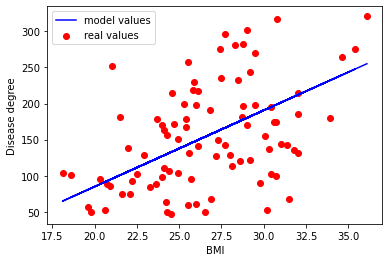

In [49]:
plt.scatter(X_test,y_test, color='red', label='real values')
plt.plot(X_test, model.predict(X_test), color='blue',label='model values')
plt.xlabel('BMI')
plt.ylabel('Disease degree')
plt.legend()
plt.show()

In [52]:
X_3_train, X_3_test, y_3_train, y_3_test=train_test_split(dataset,db.Y,test_size=0.2,random_state=0)

In [54]:
model_3=LinearRegression()

In [55]:
model_3.fit(X_3_train,y_3_train)

LinearRegression()

In [56]:
model_3.coef_

array([ -0.12913765, -23.17892315,   6.06552053,   1.05166525,
        -0.91184795,   0.50762522,   0.0911161 ,   6.28518199,
        66.69316116,   0.17823872])

In [57]:
model_3.intercept_

-308.75000596284815

In [58]:
model_3.score(X_3_test,y_3_test)

0.33223321731061806

In [60]:
coeff=model_3.coef_

In [63]:
X_labels=list(X_3_train.columns)

In [64]:
ft=pd.DataFrame()

In [65]:
ft['X_labels']=X_labels

In [67]:
ft['Coefficient']=coeff

In [81]:
ft.sort_values(by='Coefficient',ascending=True,inplace=True)

In [83]:
ft['Positive_x_influence']=ft['Coefficient']>0

In [76]:
ft.set_index('X_labels',inplace=True)

Text(0.5, 0, 'Coefficient value')

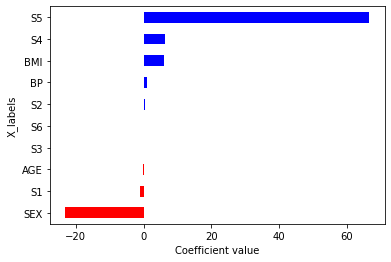

In [87]:
ft.Coefficient.plot(kind='barh',color=ft.Positive_x_influence.map({True:'blue',False:'red'}))
plt.xlabel('Coefficient value')